In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('flipkart_products_20250405.csv')
df.head()

,Product Name,Price (₹),Rating (★),Number of Buyers,Total Sold,Available Stock,Main Category,Sub Category,Discount (%),Seller,Return Policy,Product URL
0,Krishnamurthy-Devan Laboriosam Ultra Smartphon...,142247.04,3.2,7348,4812,364,Electronics,Smartphones,45,RetailNet,False,https://www.flipkart.com/Krishnamurthy-Devan-L...
1,Nanda-Mahal Dignissimos Lite Laptops 1,186922.43,4.1,2342,881,145,Electronics,Laptops,55,Flipkart Assured,False,https://www.flipkart.com/Nanda-Mahal-Dignissim...
2,Choudhury LLC Amet Plus Decor 15,11843.41,5.0,739,2580,206,Home,Decor,58,SuperComNet,True,https://www.flipkart.com/Choudhury-LLC-Amet-Pl...
3,Borah LLC Accusantium Lite Smartphones 9,10864.31,4.8,1543,4562,1585,Electronics,Smartphones,0,ElectroWorld,False,https://www.flipkart.com/Borah-LLC-Accusantium...
4,Murty Inc Placeat Pro Smartwatches 8,32950.41,4.5,7702,4925,1064,Electronics,Smartwatches,18,MobileHub,False,https://www.flipkart.com/Murty-Inc-Placeat-Pro...


In [4]:
df_shape = df.shape
df_columns = df.columns.tolist()
df_head = df.head()

df_shape, df_columns, df_head

((5000, 12),
 ['Product Name',
  'Price (₹)',
  'Rating (★)',
  'Number of Buyers',
  'Total Sold',
  'Available Stock',
  'Main Category',
  'Sub Category',
  'Discount (%)',
  'Seller',
  'Return Policy',
  'Product URL'],
                                         Product Name  Price (₹)  Rating (★)  \
 0  Krishnamurthy-Devan Laboriosam Ultra Smartphon...  142247.04         3.2   
 1             Nanda-Mahal Dignissimos Lite Laptops 1  186922.43         4.1   
 2                   Choudhury LLC Amet Plus Decor 15   11843.41         5.0   
 3           Borah LLC Accusantium Lite Smartphones 9   10864.31         4.8   
 4               Murty Inc Placeat Pro Smartwatches 8   32950.41         4.5   
 
    Number of Buyers  Total Sold  Available Stock Main Category  Sub Category  \
 0              7348        4812              364   Electronics   Smartphones   
 1              2342         881              145   Electronics       Laptops   
 2               739        2580              206 

In [5]:
missing_values = df.isnull().sum()

duplicate_rows = df.duplicated().sum()

data_types = df.dtypes

missing_values, duplicate_rows, data_types

(Product Name        0
 Price (₹)           0
 Rating (★)          0
 Number of Buyers    0
 Total Sold          0
 Available Stock     0
 Main Category       0
 Sub Category        0
 Discount (%)        0
 Seller              0
 Return Policy       0
 Product URL         0
 dtype: int64,
 0,
 Product Name         object
 Price (₹)           float64
 Rating (★)          float64
 Number of Buyers      int64
 Total Sold            int64
 Available Stock       int64
 Main Category        object
 Sub Category         object
 Discount (%)          int64
 Seller               object
 Return Policy          bool
 Product URL          object
 dtype: object)

In [6]:
numeric_summary = df.describe()

top_main_categories = df['Main Category'].value_counts().head()
top_sub_categories = df['Sub Category'].value_counts().head()
top_sellers = df['Seller'].value_counts().head()

rating_distribution = df['Rating (★)'].value_counts().sort_index()

In [7]:
numeric_summary

,Price (₹),Rating (★),Number of Buyers,Total Sold,Available Stock,Discount (%)
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,35884.094350,4.003640,5044.425600,5005.066200,1250.870200,26.208000
std,39867.681428,0.584742,2886.016013,2897.042048,1109.872427,23.484332
min,100.450000,3.000000,11.000000,50.000000,0.000000,0.000000
25%,12275.502500,3.500000,2553.750000,2495.000000,323.750000,0.000000
50%,27761.010000,4.000000,5099.500000,4972.500000,916.000000,23.000000
75%,42852.247500,4.500000,7575.500000,7571.500000,1934.250000,47.000000
max,249158.910000,5.000000,10000.000000,10000.000000,4924.000000,70.000000


In [8]:
top_main_categories

Main Category
Electronics    1275
Appliances     1263
Fashion        1239
Home           1223
Name: count, dtype: int64

In [9]:
top_sub_categories

Sub Category
Refrigerators    352
Laptops          343
Kitchenware      325
T-Shirts         320
Shoes            317
Name: count, dtype: int64

In [10]:
top_sellers

Seller
RetailNet             661
ElectroWorld          645
Cloudtail India       643
MobileHub             640
HomeCare Solutions    613
Name: count, dtype: int64

In [11]:
rating_distribution

Rating (★)
3.0    127
3.1    245
3.2    275
3.3    250
3.4    236
3.5    244
3.6    244
3.7    254
3.8    253
3.9    266
4.0    228
4.1    239
4.2    237
4.3    253
4.4    223
4.5    259
4.6    274
4.7    235
4.8    257
4.9    261
5.0    140
Name: count, dtype: int64

C:\Users\manth\AppData\Local\Temp\ipykernel_9240\3693906958.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_main_categories.values, y=top_main_categories.index, ax=axs[0, 0], palette="Blues_d")
C:\Users\manth\AppData\Local\Temp\ipykernel_9240\3693906958.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_sub_categories.values, y=top_sub_categories.index, ax=axs[0, 1], palette="Greens_d")
C:\Users\manth\AppData\Local\Temp\ipykernel_9240\3693906958.py:25: UserWarning: Glyph 9733 (\N{BLACK STAR}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\manth\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9733 (\N{

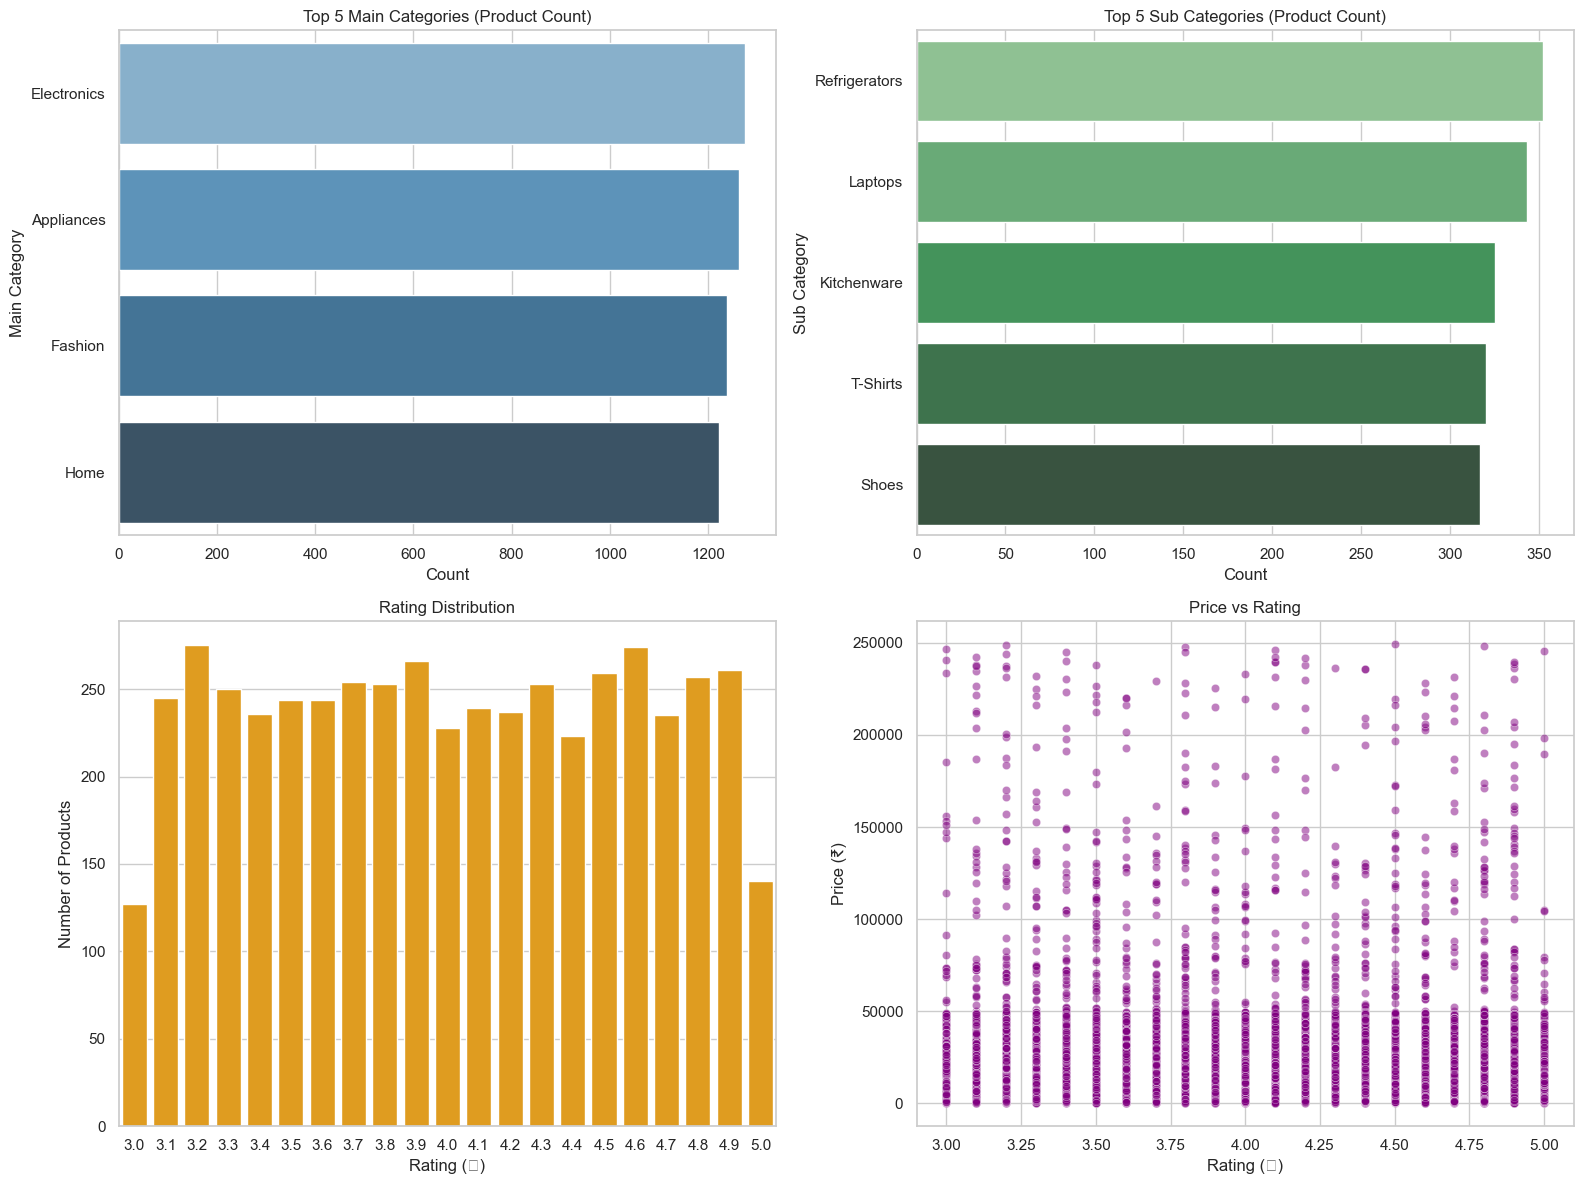

In [12]:
sns.set(style="whitegrid")

fig, axs = plt.subplots(2, 2, figsize=(16, 12))

sns.barplot(x=top_main_categories.values, y=top_main_categories.index, ax=axs[0, 0], palette="Blues_d")
axs[0, 0].set_title("Top 5 Main Categories (Product Count)")
axs[0, 0].set_xlabel("Count")
axs[0, 0].set_ylabel("Main Category")

sns.barplot(x=top_sub_categories.values, y=top_sub_categories.index, ax=axs[0, 1], palette="Greens_d")
axs[0, 1].set_title("Top 5 Sub Categories (Product Count)")
axs[0, 1].set_xlabel("Count")
axs[0, 1].set_ylabel("Sub Category")

sns.barplot(x=rating_distribution.index, y=rating_distribution.values, ax=axs[1, 0], color="orange")
axs[1, 0].set_title("Rating Distribution")
axs[1, 0].set_xlabel("Rating (★)")
axs[1, 0].set_ylabel("Number of Products")

sns.scatterplot(data=df, x='Rating (★)', y='Price (₹)', alpha=0.5, ax=axs[1, 1], color="purple")
axs[1, 1].set_title("Price vs Rating")
axs[1, 1].set_xlabel("Rating (★)")
axs[1, 1].set_ylabel("Price (₹)")

plt.tight_layout()
plt.show()

In [13]:
X = df.drop(columns=["Product Name", "Product URL", "Price (₹)"])
y = df["Price (₹)"]

categorical_cols = ["Main Category", "Sub Category", "Seller", "Return Policy"]
numeric_cols = X.select_dtypes(include=["int64", "float64"]).columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols)
    ],
    remainder="passthrough"  # Keep numeric columns as is
)

model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", LinearRegression())
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

r2, mae, rmse

(0.6496004121046406, 16767.92550619903, 24976.628826778473)

In [14]:
df["Buyers-to-Stock Ratio"] = np.where(df["Available Stock"] == 0, 0, df["Number of Buyers"] / df["Available Stock"])
df["Sold-to-Stock Ratio"] = np.where(df["Available Stock"] == 0, 0, df["Total Sold"] / df["Available Stock"])

df["Effective Price (₹)"] = df["Price (₹)"] * (1 - df["Discount (%)"] / 100)

df["Is Returnable"] = df["Return Policy"].apply(lambda x: 1 if isinstance(x, str) and "return" in x.lower() else 0)

df["Category Combo"] = df["Main Category"] + " - " + df["Sub Category"]

df[["Number of Buyers", "Available Stock", "Buyers-to-Stock Ratio", "Sold-to-Stock Ratio", 
    "Price (₹)", "Discount (%)", "Effective Price (₹)", "Is Returnable", "Category Combo"]].head()

,Number of Buyers,Available Stock,Buyers-to-Stock Ratio,Sold-to-Stock Ratio,Price (₹),Discount (%),Effective Price (₹),Is Returnable,Category Combo
0,7348,364,20.186813,13.219780,142247.04,45,78235.8720,0,Electronics - Smartphones
1,2342,145,16.151724,6.075862,186922.43,55,84115.0935,0,Electronics - Laptops
2,739,206,3.587379,12.524272,11843.41,58,4974.2322,0,Home - Decor
3,1543,1585,0.973502,2.878233,10864.31,0,10864.3100,0,Electronics - Smartphones
4,7702,1064,7.238722,4.628759,32950.41,18,27019.3362,0,Electronics - Smartwatches


In [15]:
y = df["Price (₹)"]

features = [
    "Rating (★)",
    "Number of Buyers",
    "Total Sold",
    "Available Stock",
    "Discount (%)",
    "Buyers-to-Stock Ratio",
    "Sold-to-Stock Ratio",
    "Effective Price (₹)",
    "Is Returnable",
    "Main Category",
    "Sub Category",
    "Seller",
    "Return Policy"
]

X = df[features]

# Categorical columns to encode
categorical_cols = ["Main Category", "Sub Category", "Seller", "Return Policy"]
numeric_cols = [col for col in X.columns if col not in categorical_cols]

preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols)
    ],
    remainder="passthrough"
)

model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", LinearRegression())
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

r2, mae, rmse

(0.9270114799682416, 6462.873456631083, 11399.329452187483)

In [16]:
import joblib

joblib.dump(model, "model.pkl")

['model.pkl']